In [1]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import glob
import seaborn as sns

mainfile = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\notebook\\features_0613_50세 이하.csv').set_index('No')
mainfile['agebin'] = pd.cut( mainfile.Age, [0,29,100],\
                            labels=['20s','30s+'])

''' ADDING/DROPPPING FEATURES '''
mainfile['conn_den_diff'] = mainfile['conn_den'] - mainfile['conn_den_CB']
mainfile['auc_diff'] = mainfile['auc'] - mainfile['auc_CB']

mainfile['testscore'] = (mainfile['No.ㄱ'] + mainfile['No.ㅅ']+ mainfile['No.ㅇ'])/3
mainfile['AnxietyScore'] = (mainfile['State_Anxiety_\nin_STAI'] + mainfile['Trait_Anxiety_\nin_STAI'])/2
mainfile=mainfile.drop(['No.ㄱ', 'No.ㅅ','No.ㅇ','Trait_Anxiety_\nin_STAI', 'State_Anxiety_\nin_STAI'], axis=1)
#mainfile['testscore'] = mainfile['No.ㄱ'] + mainfile['No.ㅅ']
#mainfile.drop(['No.ㄱ', 'No.ㅅ'], axis=1)

In [52]:
mainfile.to_csv('BdmannFeatures2.csv', encoding='utf-8-sig')

In [53]:
mainfile.groupby(['agebin','Dz_G']).mean()['conn_den']

agebin  Dz_G
20s     1       0.674205
        2       0.623339
30s+    1       0.535126
        2       0.580326
Name: conn_den, dtype: float64

In [8]:
mainfile.groupby(['Dz_G']).count()

,Date,Hospital_\nNo,Name,Diagnosis,Dz_RE,Birth,Sex,Age,뇌파_검사_여부,설문지_날짜,...,slope_int_6,mean_int_6,slope_7,mean_7,std_7,slope_int_7,mean_int_7,agebin,testscore,AnxietyScore
Dz_G,,,,,,,,,,,,,,,,,,,,,
1,37,4,37,37,37,35,37,37,20,36,...,34,34,34,34,34,34,34,37,37,35
2,61,61,61,61,61,61,61,61,59,58,...,53,53,53,53,53,53,53,61,61,56


In [83]:
''' PROCEED WITH Dz_G GROUP '''
mainfile.groupby(['Dz_G']).mean()[['auc_diff','testscore','AnxietyScore','std_CB','std','conn_den_CB',\
                                      'conn_den','auc','slope','mean','mean_CB','slope_int']]#.to_csv('withDzG_mean.csv')

#mainfile.groupby(['Dz_G']).std()[['testscore','AnxietyScore','std_CB','std','conn_den_CB',\
#                                      'conn_den','auc','slope','mean','slope_int']]#.to_csv('withDzG_std.csv')

,auc_diff,testscore,AnxietyScore,std_CB,std,conn_den_CB,conn_den,auc,slope,mean,mean_CB,slope_int
Dz_G,,,,,,,,,,,,
1,0.645265,1.823993,7.606582,0.000197,0.000392,0.206761,0.180759,0.551429,0.000003,0.001093,0.000536,0.000009
2,0.529395,2.155721,10.720883,0.000170,0.000306,0.175290,0.200421,0.432159,0.000003,0.000857,0.000483,0.000009


In [84]:
#mainfile.to_csv('hello3.csv')
mainfile.groupby('Dz_G').count()

,Date,Hospital_\nNo,Name,Diagnosis,Dz_RE,Birth,Sex,Age,뇌파_검사_여부,설문지_날짜,...,slope_int_6,mean_int_6,slope_7,mean_7,std_7,slope_int_7,mean_int_7,agebin,testscore,AnxietyScore
Dz_G,,,,,,,,,,,,,,,,,,,,,
1,37,4,37,37,37,35,37,37,20,36,...,34,34,34,34,34,34,34,37,37,35
2,61,61,61,61,61,61,61,61,59,58,...,53,53,53,53,53,53,53,61,61,56


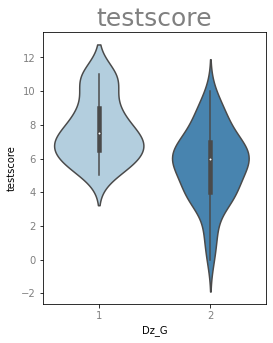

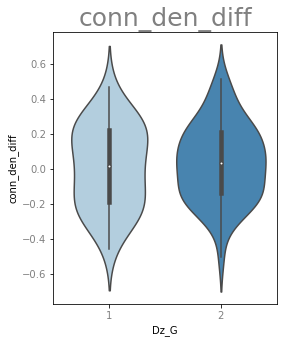

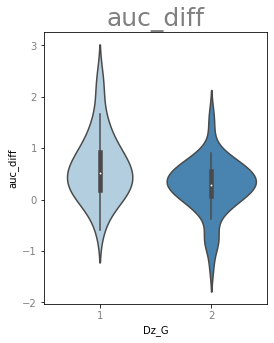

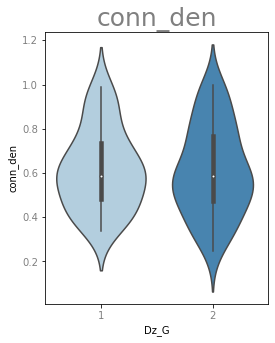

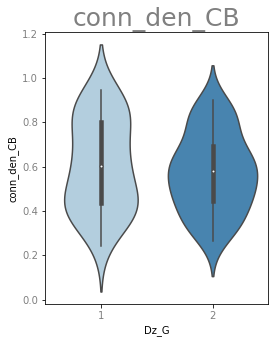

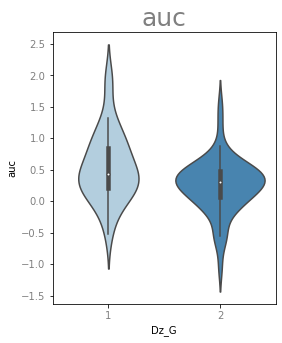

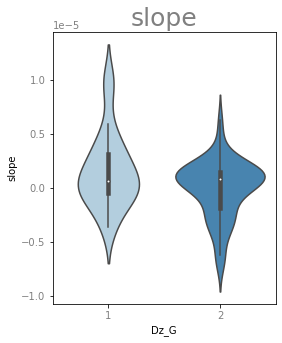

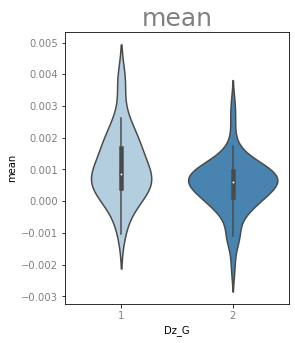

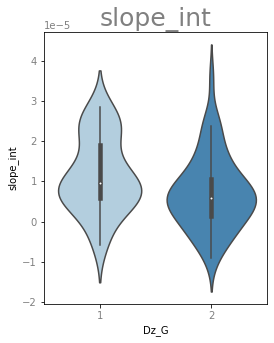

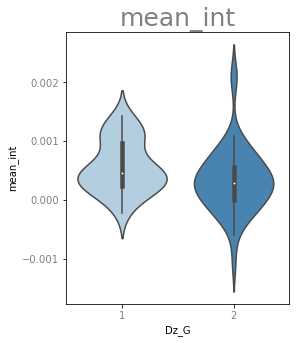

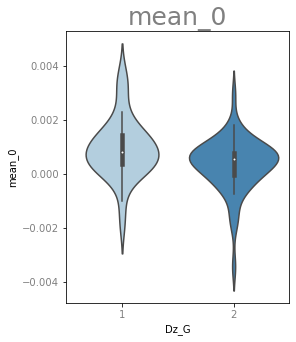

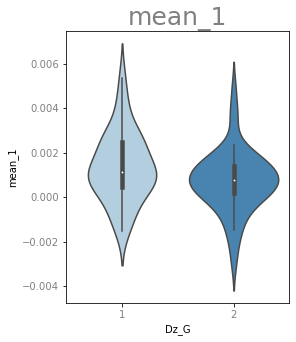

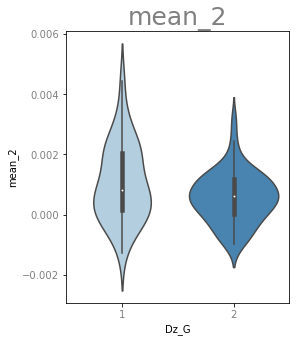

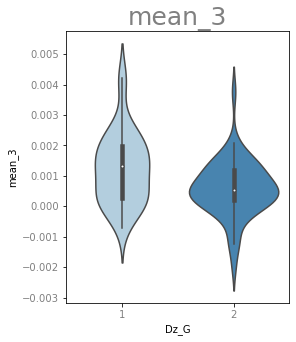

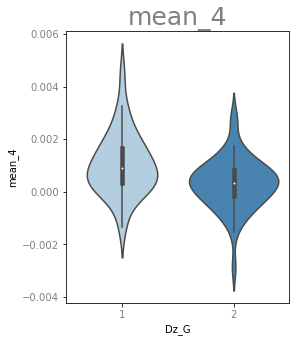

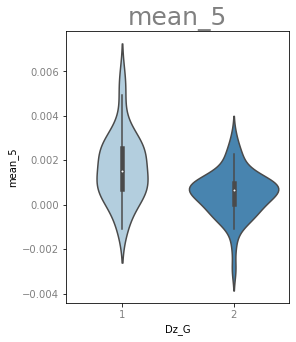

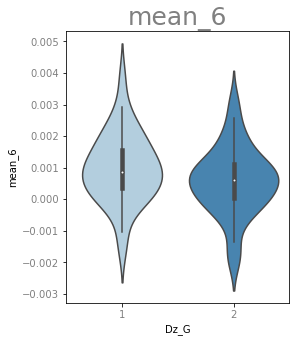

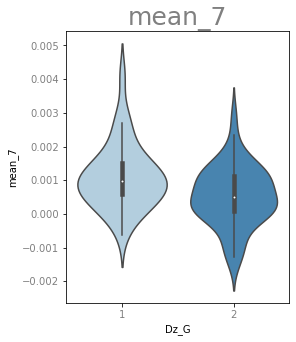

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


TARGETS = ['testscore', 'conn_den_diff', 'auc_diff', 'conn_den', 'conn_den_CB', 'auc', 'slope', 'mean',\
          'slope_int', 'mean_int','mean_0','mean_1','mean_2','mean_3','mean_4','mean_5',\
           'mean_6','mean_7']
for TARGET in TARGETS:
    #ax = mainfile.boxplot(column=TARGET, by=['Dz_G'])\
    plt.figure(figsize=(4,5))
    ax = sns.violinplot(x='Dz_G', y=TARGET, data=mainfile, palette='Blues')
    ax.tick_params(labelcolor = 'grey')
    ax.set_title(f'{TARGET}', color='grey', fontsize=25)
    plt.savefig(f'{TARGET}.png')


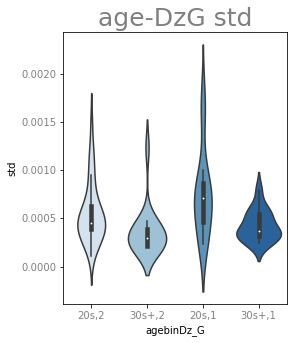

In [284]:
mainfile['agebinDz_G']=mainfile['agebin'].astype(str)+','+mainfile['Dz_G'].astype(str)

TARGETS = ['std']
for TARGET in TARGETS:
    #ax = mainfile.boxplot(column=TARGET, by=['Dz_G'])\
    plt.figure(figsize=(4,5))
    ax = sns.violinplot(x='agebinDz_G', y=TARGET, data=mainfile, palette='Blues')
    ax.tick_params(labelcolor = 'grey')
    ax.set_title(f'age-DzG {TARGET}', color='grey', fontsize=25)
    plt.savefig(f'age-DzG {TARGET}.png')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


TARGETS = ['testscore', 'conn_den_diff', 'auc_diff', 'conn_den', 'conn_den_CB', 'auc', 'slope', 'mean',\
          'slope_int', 'mean_int','mean_0','mean_1','mean_2','mean_3','mean_4','mean_5',\
           'mean_6','mean_7']
for TARGET in TARGETS:
    #ax = mainfile.boxplot(column=TARGET, by=['Dz_G'])\
    plt.figure(figsize=(4,5))
    ax = sns.violinplot(x='Dz_G', y=TARGET, data=mainfile, palette='Blues')
    ax.tick_params(labelcolor = 'grey')
    ax.set_title(f'{TARGET}', color='grey', fontsize=25)
    plt.savefig(f'{TARGET}.png')

In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


for i in ['slope_int_3','slope_int_4','slope_int_5','slope_int_7']:
    model = ols(f'{i} ~ C(Dz_G)', data=mainfile).fit()
    aov_table = anova_lm(model, typ=2)
    
    plt.rc('figure', figsize=(6, 0.8))
    plt.text(0.01, 0.05, str(aov_table), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    tt = int(i.split('_')[-1])
    #plt.title(f'slp_int ch# {tt+1}')
    #plt.savefig(f'slp_int ch# {tt+1}.png')
    plt.close()
    print(aov_table)

                sum_sq    df         F    PR(>F)
C(Dz_G)   7.747221e-10   1.0  7.458909  0.007674
Residual  8.828553e-09  85.0       NaN       NaN
                sum_sq    df         F    PR(>F)
C(Dz_G)   4.392651e-10   1.0  4.383577  0.039266
Residual  8.517596e-09  85.0       NaN       NaN
                sum_sq    df          F    PR(>F)
C(Dz_G)   1.061032e-09   1.0  10.046227  0.002164
Residual  8.449197e-09  80.0        NaN       NaN
                sum_sq    df         F    PR(>F)
C(Dz_G)   6.535385e-10   1.0  6.849263  0.010495
Residual  8.110474e-09  85.0       NaN       NaN


In [315]:
import numpy
a = np.arange(48)
b = [f'slope_{i}' for i in a]


df = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\notebook\\hello2.csv')
bins = []
for i in [f'avg_{i}' for i in a]:
    model = ols(f'{i} ~ C(Dz_G)', data=df).fit()
    aov_table = anova_lm(model, typ=2)
    bins.append( [i, aov_table['PR(>F)'][0]])
#     plt.rc('figure', figsize=(6, 0.8))
#     plt.text(0.01, 0.05, str(aov_table), {'fontsize': 10}, fontproperties = 'monospace')
#     plt.axis('off')
#     plt.tight_layout()
#     tt = int(i.split('_')[-1])

In [81]:
pd.DataFrame(bins).T.to_csv('avgs.csv')

In [337]:
df = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\notebook\\features_bdmann.csv').set_index('No')
df['agebinDz_G']=df['agebin']+','+df['Dz_G'].astype(str)

In [339]:
df.to_csv('BdmannFeatures.csv', encoding = 'utf-8-sig')

In [2]:
df = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\notebook\\features_bdmann.csv').set_index('No')

In [59]:
df[df['Dz_G']==2].index

Index(['N-1', 'N-2', 'N-7', 'N-8', 'N-9', 'N-14', 'N-15', 'N-16', 'N-19',
       'N-22', 'N-25', 'N-26', 'N-28', 'N-29', 'N-33', 'N-36', 'N-39', 'N-40',
       'N-44', 'N-48', 'N-49', 'N-50', 'N-51', 'N-52', 'N-57', 'N-60', 'N-63',
       'N-65', 'N-66', 'N-68', 'N-73', 'N-77', 'N-82', 'N-85', 'N-86', 'N-92',
       'N-93', 'N-95', 'N-97', 'N-98', 'N-100', 'N-103', 'N-106', 'N-109',
       'N-111', 'N-113', 'N-114', 'N-115', 'N-116', 'N-118', 'N-120', 'N-122',
       'N-126', 'N-142', 'N-143', 'N-144', 'N-156', 'N-157', 'N-158', 'N-161',
       'N-167'],
      dtype='object', name='No')

In [3]:
a = df.groupby(['agebin','Dz_G']).mean()[['testscore','AnxietyScore','mean_CB','mean','conn_den_CB','conn_den',\
                             'std_CB','std','auc','slope_int']]#
b = df.groupby(['agebin','Dz_G']).std()[['testscore','AnxietyScore','mean_CB','mean','conn_den_CB','conn_den',\
                             'std_CB','std','auc','slope_int']]#
c = pd.concat([a,b], axis=0)
#c.to_csv('fourvars.csv')

In [4]:
df.columns

Index(['Date', 'Hospital_\nNo', 'Name', 'Diagnosis', 'Dz_RE', 'Dz_G', 'Birth',
       'Sex', 'Age', '뇌파_검사_여부',
       ...
       'bd6_slope_int_CB', 'bd7_mean_CB', 'bd7_auc_CB', 'bd7_slope_int_CB',
       'agebin', 'conn_den_diff', 'auc_diff', 'testscore', 'AnxietyScore',
       'agebinDz_G'],
      dtype='object', length=102)

Text(0.5, 1.0, '')

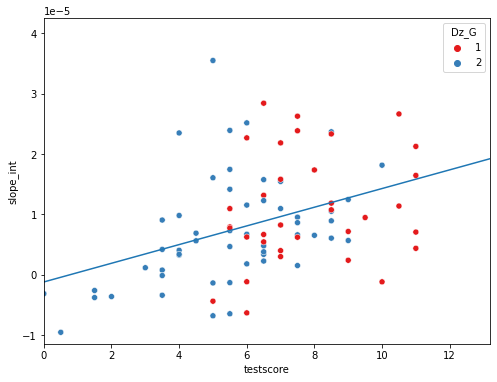

In [5]:
'''
막간을 이용한 scatterplot + bfline
'''

import scipy

x = df['testscore']
y = df['slope_int']

idx = np.isfinite(x) & np.isfinite(y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[idx],y[idx])

fig, ax = plt.subplots(figsize=(8,6))
bfl_y = np.arange(len(x))
bfl_y = (bfl_y*slope)+intercept
ax.plot(bfl_y)
sns.scatterplot(x='testscore', y='slope_int', hue='Dz_G', data=df, palette='Set1')

plt.xlim(x.min()*1.2,x.max()*1.2)
plt.ylim(y.min()*1.2,y.max()*1.2)
plt.title('')


In [158]:
index = df[(df['Dz_G']==1)].index.tolist()
sorted([a.split('-')[-1] for a in index])

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
df.head(2)
# print(df.loc['N-110']['mean'])
# print(df.loc['N-114']['mean'])

c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Date,Hospital_\nNo,Name,Diagnosis,Dz_RE,Dz_G,Birth,Sex,Age,뇌파_검사_여부,설문지_날짜,비고,거주지역,학력,직업,ARSR_ver_1.1,_,_.U,_.V,_.W,_.X,_.Y,K_AADHDS,IN,IN_개수_,HA,HA_개수_,PHQ_9,GARS_scale,BAI,BDI_II,SSI_BECK,스마트폰_\n과의존_척도,AUDIT_K,conn_den,auc,slope,mean,std,slope_int,mean_int,bd0_mean,bd0_auc,bd0_slope_int,bd1_mean,bd1_auc,bd1_slope_int,bd2_mean,bd2_auc,bd2_slope_int,bd3_mean,bd3_auc,bd3_slope_int,bd4_mean,bd4_auc,bd4_slope_int,bd5_mean,bd5_auc,bd5_slope_int,bd6_mean,bd6_auc,bd6_slope_int,bd7_mean,bd7_auc,bd7_slope_int,conn_den_CB,auc_CB,slope_CB,mean_CB,std_CB,slope_int_CB,mean_int_CB,bd0_mean_CB,bd0_auc_CB,bd0_slope_int_CB,bd1_mean_CB,bd1_auc_CB,bd1_slope_int_CB,bd2_mean_CB,bd2_auc_CB,bd2_slope_int_CB,bd3_mean_CB,bd3_auc_CB,bd3_slope_int_CB,bd4_mean_CB,bd4_auc_CB,bd4_slope_int_CB,bd5_mean_CB,bd5_auc_CB,bd5_slope_int_CB,bd6_mean_CB,bd6_auc_CB,bd6_slope_int_CB,bd7_mean_CB,bd7_auc_CB,bd7_slope_int_CB,agebin,conn_den_diff,auc_diff,testscore,AnxietyScore,polyfit
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N-1,Guest 2\n2019-10-22\npm 3:11,2149723,최희영,MDD,MDD,2,1991-04-07,2,28,2019.10.18,2019. 10. 17,NaN,9.0,2.0,1.0,14.0,0.0,2.0,3.0,4.0,3.0,2.0,32.0,18.0,2.0,14.0,0.0,18.0,39.0,30.0,35.0,16.0,18.0,5.0,0.584220,0.383461,0.000002,0.000760,0.000266,0.000007,0.000399,0.000751,0.378582,0.000007,0.000892,0.449414,0.000008,0.000717,0.361408,0.000006,0.000374,0.188846,0.000004,0.000372,0.187798,0.000003,0.000805,0.405952,0.000008,0.001198,0.603939,0.00001,0.000831,0.419222,0.000009,0.843972,-0.154568,-0.000004,-0.000594,0.000307,-0.000006,-0.000318,-0.000458,-0.119268,-0.000005,-0.000719,-0.186969,-0.000007,-0.000636,-0.165644,-0.000008,-0.000648,-0.168654,-0.000008,-0.000212,-0.055054,-0.000002,-0.000407,-0.105903,-0.000003,-0.000710,-0.184851,-0.000007,-0.000905,-0.235689,-0.000011,20s,-0.259752,0.538029,4.5,56.5,0.000007
N-2,Guest 3\n2019-10-23\nam 8:33,1494811,사민재,Other bipolar affective disorders,MDD,2,1996-12-27,1,22,2019.10.23,2019. 10. 22,NaN,1.0,2.0,0.0,21.0,3.0,4.0,4.0,4.0,3.0,3.0,56.0,28.0,9.0,28.0,7.0,27.0,42.0,51.0,57.0,28.0,20.0,33.0,0.558511,0.569419,0.000002,0.001105,0.000401,0.000014,0.000750,0.000790,0.398865,0.000010,0.000390,0.196934,0.000004,0.001984,1.000929,0.000024,0.001348,0.680105,0.000018,0.000472,0.238240,0.000011,0.000291,0.147107,0.000005,0.001733,0.874553,0.00002,0.000987,0.497739,0.000013,0.843085,-0.250856,-0.000006,-0.000944,0.000495,-0.000007,-0.000516,-0.001055,-0.274691,-0.000009,-0.000799,-0.208140,-0.000009,-0.001330,-0.346127,-0.000011,-0.000682,-0.177438,-0.000003,-0.000654,-0.170081,-0.000003,-0.001151,-0.299700,-0.000012,-0.001087,-0.282795,-0.000008,-0.000739,-0.192331,-0.000005,20s,-0.284574,0.820275,5.5,76.0,0.000009


In [54]:
subfile = 'D:\\순천향병원\\참조 분석 코드\\notebook\\featdf.csv'
sub = pd.read_csv(subfile, index_col='Unnamed: 0')
sub = sub.rename(index={'N-Guest2':'N-1', 'N-Guest3':'N-2', 'N-09':'N-9','N-10':'N-8'})
#header = mainfile[['Dz_G','agebin','Age','testscore','AnxietyScore']]
header=mainfile.loc[:,:'AUDIT_K']
addendum = mainfile.loc[:,'agebin':'AnxietyScore']
aa = header.join(addendum)
bb = aa.join(sub)
bb['testscore'] = mainfile['testscore']
#bb.to_csv('ChannelMeans2.csv', encoding='utf-8-sig')

In [55]:
sub.columns

Index(['avg_0', 'avg_1', 'avg_2', 'avg_3', 'avg_4', 'avg_5', 'avg_6', 'avg_7',
       'avg_8', 'avg_9', 'avg_10', 'avg_11', 'avg_12', 'avg_13', 'avg_14',
       'avg_15', 'avg_16', 'avg_17', 'avg_18', 'avg_19', 'avg_20', 'avg_21',
       'avg_22', 'avg_23', 'avg_24', 'avg_25', 'avg_26', 'avg_27', 'avg_28',
       'avg_29', 'avg_30', 'avg_31', 'avg_32', 'avg_33', 'avg_34', 'avg_35',
       'avg_36', 'avg_37', 'avg_38', 'avg_39', 'avg_40', 'avg_41', 'avg_42',
       'avg_43', 'avg_44', 'avg_45', 'avg_46', 'avg_47', 'slp_int_0',
       'slp_int_1', 'slp_int_2', 'slp_int_3', 'slp_int_4', 'slp_int_5',
       'slp_int_6', 'slp_int_7', 'slp_int_8', 'slp_int_9', 'slp_int_10',
       'slp_int_11', 'slp_int_12', 'slp_int_13', 'slp_int_14', 'slp_int_15',
       'slp_int_16', 'slp_int_17', 'slp_int_18', 'slp_int_19', 'slp_int_20',
       'slp_int_21', 'slp_int_22', 'slp_int_23', 'slp_int_24', 'slp_int_25',
       'slp_int_26', 'slp_int_27', 'slp_int_28', 'slp_int_29', 'slp_int_30',
       'slp_int

In [43]:
bb.columns

Index(['Date', 'Hospital_\nNo', 'Name', 'Diagnosis', 'Dz_RE', 'Dz_G', 'Birth',
       'Sex', 'Age', '뇌파_검사_여부',
       ...
       'slp_int_38', 'slp_int_39', 'slp_int_40', 'slp_int_41', 'slp_int_42',
       'slp_int_43', 'slp_int_44', 'slp_int_45', 'slp_int_46', 'slp_int_47'],
      dtype='object', length=133)

In [189]:
'''
anova
'''

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#data = aa[aa['agebin']=='20s']
data = aa
avgs = [a for a in data.columns if a.split('_')[0]=='avg']
slps = [a for a in data.columns if a.split('_')[0]=='slp']
slps = [a for a in data.columns if a.split('_')[0]=='slp']

avgs_p = []
slps_p = []
testsco = []
anxsco = []
for i in range(len(avgs)):
    model = ols(f'{avgs[i]} ~ C(Dz_G) + C(agebin) + C(Dz_G):C(agebin)', data=data).fit()
    aov_table = anova_lm(model, typ=2)
    avgs_p.append(aov_table['PR(>F)'][2])
    
    model = ols(f'{slps[i]} ~ C(Dz_G) + C(agebin) + C(Dz_G):C(agebin)', data=data).fit()
    aov_table2 = anova_lm(model, typ=2)
    slps_p.append(aov_table2['PR(>F)'][2])
    
    plt.rc('figure', figsize=(6, 1.5))
    plt.text(0.01, 0.05, str(aov_table), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'ANOVA-avg ch# {i+1}.png')
    plt.close()
    
    plt.rc('figure', figsize=(6, 1.5))
    plt.text(0.01, 0.05, str(aov_table2), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'ANOVA-slp_int ch# {i+1}.png')
    plt.close()
    
np.where(np.array(avgs_p) < 0.05)

(array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 25, 30, 31, 33,
        37, 38, 39, 42, 43, 44, 46, 47], dtype=int32),)

In [190]:
cols = [f'ch#{i}' for i in np.arange(48)]
anovadf = pd.DataFrame([avgs_p, slps_p], columns=cols, index=['avgs','slope_int'])
anovadf.to_csv('pvalues.csv')

In [321]:
avgs = [a for a in data.columns if a.split('_')[0]=='avg']
slps = [a for a in data.columns if a.split('_')[0]=='slp']

avgs_p = []
for i in range(len(avgs)):
    model = ols(f'{avgs[i]} ~ C(Dz_G)', data=data).fit()
    aov_table = anova_lm(model, typ=3)
    avgs_p.append(aov_table['PR(>F)'][1])

In [329]:
import scipy
avgs_p = []
for i in range(len(avgs)):
    a,b = scipy.stats.ttest_ind(data['Dz_G'], data[f'{avgs[i]}'], nan_policy='omit')
    avgs_p.append(b)
    
avgs_p
    

[3.1458728659523263e-74,
 3.1778629826840106e-74,
 3.1200361577610013e-74,
 3.2688520256285497e-74,
 3.224317342197958e-74,
 7.957773930577277e-75,
 8.167602650917821e-75,
 7.964471250973363e-75,
 3.2613922820949598e-74,
 3.2770715519030804e-74,
 3.2845860863471684e-74,
 8.246148170885259e-75,
 8.185034177468275e-75,
 8.320114697759661e-75,
 8.14841290048312e-75,
 8.053074513401312e-75,
 3.152155025080385e-74,
 7.646686900884737e-75,
 7.863690205198663e-75,
 7.816762443280377e-75,
 7.937083416813693e-75,
 7.818439763659316e-75,
 7.882112883536127e-75,
 8.060616309322768e-75,
 7.936485830993745e-75,
 7.95100214526245e-75,
 7.99973702060299e-75,
 7.953132446839527e-75,
 7.997062582240895e-75,
 7.908094519472863e-75,
 7.951266386947365e-75,
 7.919297586398238e-75,
 7.791179551026698e-75,
 7.913733432015835e-75,
 7.763043099745473e-75,
 7.8990602758227095e-75,
 7.961266730893464e-75,
 7.873910402308225e-75,
 8.005174713214592e-75,
 8.072506991922391e-75,
 8.187378593674109e-75,
 8.15585793

In [202]:
cols = [f'ch#{i}' for i in np.arange(48)]
anovadf = pd.DataFrame([avgs_p], columns=cols, index=['avgs'])
anovadf.to_csv('onevar.csv')

In [41]:
bb.columns

Index(['Date', 'Hospital_\nNo', 'Name', 'Diagnosis', 'Dz_RE', 'Dz_G', 'Birth',
       'Sex', 'Age', '뇌파_검사_여부', '설문지_날짜', '비고', '거주지역', '학력', '직업',
       'ARSR_ver_1.1', '_', '_.U', '_.V', '_.W', '_.X', '_.Y', 'K_AADHDS',
       'IN', 'IN_개수_', 'HA', 'HA_개수_', 'PHQ_9', 'GARS_scale', 'BAI', 'BDI_II',
       'SSI_BECK', '스마트폰_\n과의존_척도', 'AUDIT_K', 'conn_den_CB', 'auc_CB',
       'slope_CB', 'mean_CB', 'std_CB', 'slope_int_CB', 'mean_int_CB',
       'conn_den_diff', 'auc_diff', 'conn_den', 'auc', 'slope', 'mean', 'std',
       'slope_int', 'mean_int', 'slope_0', 'mean_0', 'std_0', 'slope_int_0',
       'mean_int_0', 'slope_1', 'mean_1', 'std_1', 'slope_int_1', 'mean_int_1',
       'slope_2', 'mean_2', 'std_2', 'slope_int_2', 'mean_int_2', 'slope_3',
       'mean_3', 'std_3', 'slope_int_3', 'mean_int_3', 'slope_4', 'mean_4',
       'std_4', 'slope_int_4', 'mean_int_4', 'slope_5', 'mean_5', 'std_5',
       'slope_int_5', 'mean_int_5', 'slope_6', 'mean_6', 'std_6',
       'slope_int_6', 'me

Text(0.5, 1.0, 'correlation matrix 30s+')

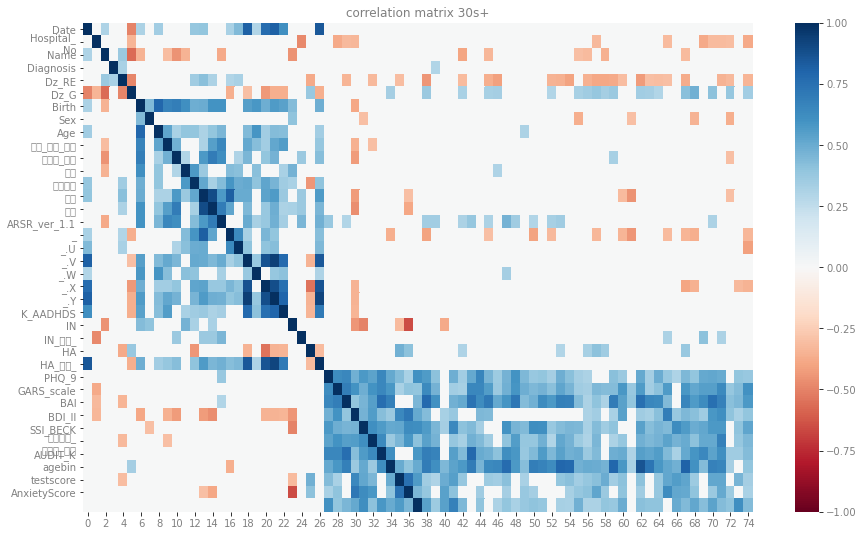

In [48]:
'''
corr
'''

#bb = data
bb2 = bb[bb['agebin']=='30s+']
bb2=bb2.loc[:,:'avg_47']
bb2=bb2.drop('agebin', axis=1)
corr = bb2.corr('spearman').values
#corr = np.corrcoef(bb[tg].to_numpy())
corr = np.where(abs(corr)<0.3, 0, corr)

plt.figure(figsize=(15,9))
corr= pd.DataFrame(corr).iloc[:38,:]

ax2 = sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu', yticklabels=bb.columns[:37])
plt.tick_params(labelcolor = 'grey')
cbar = ax2.collections[0].colorbar
cbar.ax.tick_params(labelcolor='grey')
plt.title('correlation matrix 30s+', color='grey')
#plt.savefig('correlation matrix 30s+.jpg')

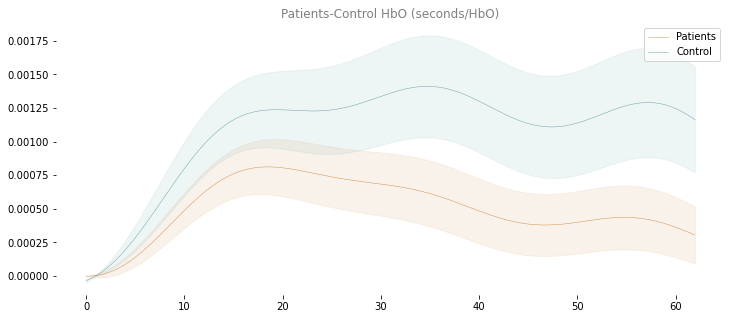

In [267]:
'''
hbo
'''
root = 'D:\\순천향병원\\참조 분석 코드\\notebook\\2030s\\'
pat2 = 'patients_task.csv'
nor2 = 'normals_task.csv'


pat = pd.read_csv(root+pat2).iloc[:,1:]
nor = pd.read_csv(root+nor2).iloc[:,1:]
nor.columns = np.arange(nor.shape[1])/8.136
pat.columns = np.arange(pat.shape[1])/8.136

a = pat.mean(axis=0)
b = pat.std(axis=0)
c = nor.mean(axis=0)
d = nor.std(axis=0)

plt.figure(figsize=(12,5))
plt.plot(pat.columns, a, linewidth=0.5, alpha=0.9, color='peru', label='Patients')
plt.fill_between(pat.columns, a-b, a+b,alpha=0.1, color='peru')

plt.plot(nor.columns, c, linewidth=0.5, alpha=0.9,color='cadetblue', label='Control')
plt.fill_between(pat.columns, c-d, c+d,alpha=0.1,color='cadetblue')
plt.title('Patients-Control HbO (seconds/HbO)', color='grey')
plt.legend()
#plt.ylim(-0.0012, 0.001)
#plt.ylim(-0.001, 0.0045)
plt.box(False)
#plt.savefig('Patients-Control HbO.png', dpi=100)


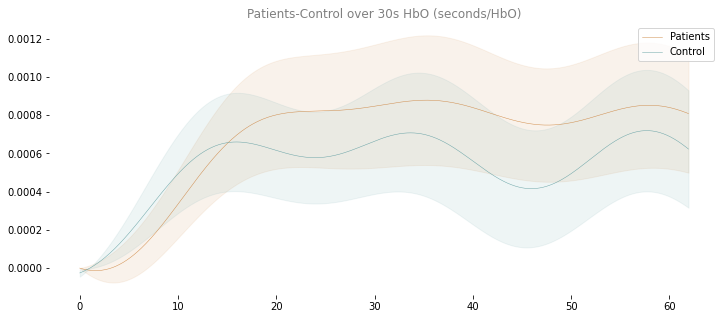

In [335]:
'''
hbo
'''
root = 'D:\\순천향병원\\참조 분석 코드\\notebook\\2030s\\'
pat2 = 'patient30s_task.csv'
nor2 = 'normal30s_task.csv'


pat = pd.read_csv(root+pat2).iloc[:,1:]
nor = pd.read_csv(root+nor2).iloc[:,1:]
nor.columns = np.arange(nor.shape[1])/8.136
pat.columns = np.arange(pat.shape[1])/8.136

a = pat.mean(axis=0)
b = pat.std(axis=0)
c = nor.mean(axis=0)
d = nor.std(axis=0)

plt.figure(figsize=(12,5))
plt.plot(pat.columns, a, linewidth=0.5, alpha=0.9, color='peru', label='Patients')
plt.fill_between(pat.columns, a-b, a+b,alpha=0.1, color='peru')

plt.plot(nor.columns, c, linewidth=0.5, alpha=0.9,color='cadetblue', label='Control')
plt.fill_between(pat.columns, c-d, c+d,alpha=0.1,color='cadetblue')
plt.title('Patients-Control over 30s HbO (seconds/HbO)', color='grey')
plt.legend()
#plt.ylim(-0.0012, 0.001)
#plt.ylim(-0.001, 0.0045)
plt.box(False)
plt.savefig('Patients-Control over 30s HbO.png', dpi=100)


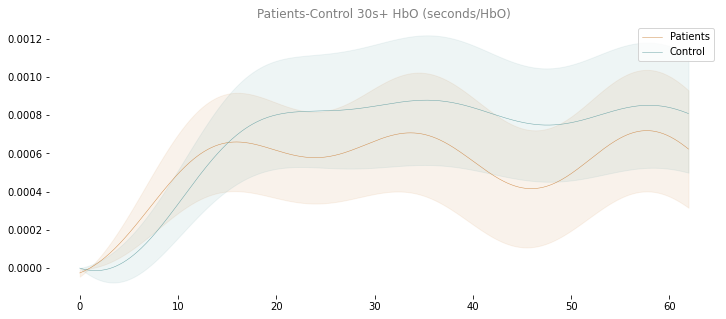

In [270]:
'''
hbo
'''
root = 'D:\\순천향병원\\참조 분석 코드\\notebook\\2030s\\'
pat2 = 'normal30s_task.csv'
nor2 = 'patient30s_task.csv'


pat = pd.read_csv(root+pat2).iloc[:,1:]
nor = pd.read_csv(root+nor2).iloc[:,1:]
nor.columns = np.arange(nor.shape[1])/8.136
pat.columns = np.arange(pat.shape[1])/8.136

a = pat.mean(axis=0)
b = pat.std(axis=0)
c = nor.mean(axis=0)
d = nor.std(axis=0)

plt.figure(figsize=(12,5))
plt.plot(pat.columns, a, linewidth=0.5, alpha=0.9, color='peru', label='Patients')
plt.fill_between(pat.columns, a-b, a+b,alpha=0.1, color='peru')

plt.plot(nor.columns, c, linewidth=0.5, alpha=0.9,color='cadetblue', label='Control')
plt.fill_between(pat.columns, c-d, c+d,alpha=0.1,color='cadetblue')
plt.title('Patients-Control 30s+ HbO (seconds/HbO)', color='grey')
plt.legend()
#plt.ylim(-0.0012, 0.001)
#plt.ylim(-0.001, 0.0045)
plt.box(False)
plt.savefig('Patients-Control 30s+ HbO.png', dpi=100)

In [300]:
pd.set_option('display.max_columns', 20)  # or 1000
pd.set_option('display.max_rows', 5)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
df = pd.read_csv('ChannelMeans.csv').set_index('No')
df['agebin'] = pd.cut( df.Age, [0,30,100], labels=['20s','30s+'])
df.to_csv('ChannelMeans.csv')

c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until
